In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
import seaborn as sns

%matplotlib notebook
#%matplotlib

In [2]:
#log_dir='./logs/sv1R2_1117_101816_sv1R2gaussElu_testrun'
#log_dir='./logs/Model_1119_160503_R2Clean'
log_dir='./logs/Model_1119_161647_R2Clean'
record_dir=os.path.join(log_dir,'records')

In [153]:
from tboard import file2number
id_str=str(file2number(log_dir))

In [3]:
def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

In [4]:
def get_path(name,prefix,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/'+prefix+'*.npy')
    hasname=filter(lambda s:name in s[s.rfind(prefix):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind(prefix):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


In [6]:
W1=np.load(get_path('W1','wwatch'))
dW2=np.load(get_path('delu','wwatch'))
step=np.load(get_path('step','wwatch'))
gridP=np.load(get_path('Prob','hmwatch'))
gridX=np.load(get_path('gridX','hmwatch'))

In [7]:
gridP.shape, gridX.shape

((500, 28, 24, 2), (28, 24, 2))

In [8]:
##Normalize Sizes##
wmax=W1.max(axis=0).max(axis=1)
wmin=W1.min(axis=0).min(axis=1)
xmax=npX.max(axis=0)
xmin=npX.min(axis=0)
dw2max=dW2.max(axis=0)
dw2min=dW2.min(axis=0)
wx_scale=(xmax-xmin)/(wmax-wmin)
print 'scale x/scale w',wx_scale

scale x/scale w [ 1.32393956  8.93849277]


<IPython.core.display.Javascript object>


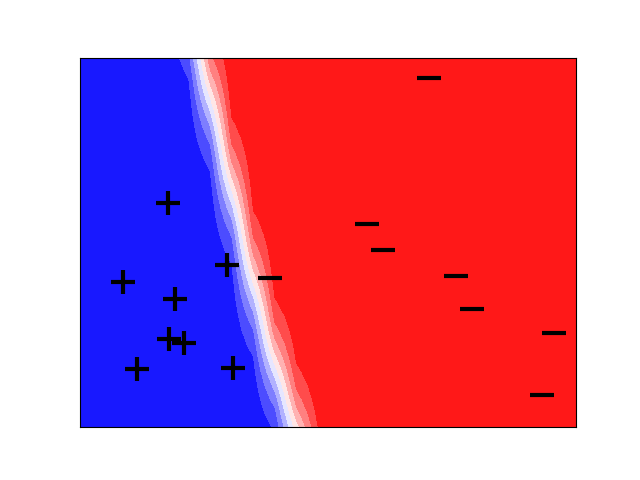

In [134]:
# For the saved animation the duration is going to be frames * (1 / fps) (in seconds)
# For the display animation the duration is going to be frames * interval / 1000 (in seconds)
del_t=2
#n_frames=len(step)//del_t
fig,ax=plt.subplots()


levels=np.linspace(0,1,11)#c='b',
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[0,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r,ticks=[])
#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r)
def animate(time):
    global ctf
    for c in ctf.collections:
        c.remove()
    ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[time,:,:,1],
                    cmap=plt.cm.bwr_r,vmin=0,vmax=1,levels=levels)
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='k',s=300,edgecolors='m',linewidth='3')
    return ctf
#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)#, interval=500)

In [135]:
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=100)
#writer = Writer(metadata=dict(artist='Me'), fps=50)
#writer = Writer(metadata=dict(artist='Me'), bitrate=3800,fps=50)
anim.save(record_dir+'/R2Clean_delt2_fps100.mp4', writer=writer)
#anim.save(record_dir+'/R2Clean_10int_100fps.mp4', writer=animation.FFMpegWriter())#DOH

<IPython.core.display.Javascript object>


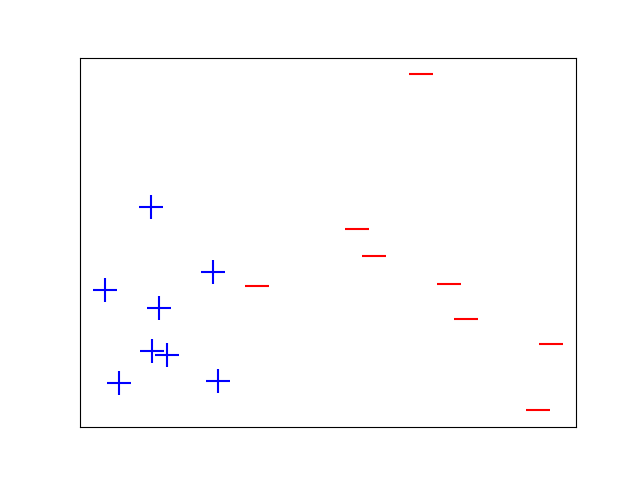

In [141]:
fig,ax=plt.subplots()

plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/noanno_scatter_data.pdf')
plt.savefig(record_dir+'/noanno_scatter_data.jpg')

<IPython.core.display.Javascript object>


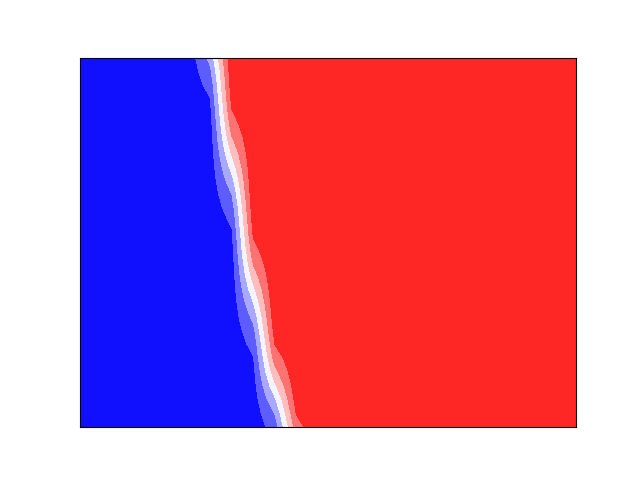

In [139]:
fig,ax=plt.subplots()
levels=np.linspace(0,1,11)#c='b',
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[-1,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/noanno_ctfbdry.pdf')
plt.savefig(record_dir+'/noanno_ctfbdry.jpg')

##  Noisy data

In [142]:
log_dir='./logs/Model_1119_183937_hmapR2Noisy'
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))

In [143]:
def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

def get_path(name,prefix,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/'+prefix+'*.npy')
    hasname=filter(lambda s:name in s[s.rfind(prefix):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind(prefix):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


W1=np.load(get_path('W1','wwatch'))
dW2=np.load(get_path('delu','wwatch'))
step=np.load(get_path('step','wwatch'))
gridP=np.load(get_path('Prob','hmwatch'))
gridX=np.load(get_path('gridX','hmwatch'))

##Normalize Sizes##
wmax=W1.max(axis=0).max(axis=1)
wmin=W1.min(axis=0).min(axis=1)
xmax=npX.max(axis=0)
xmin=npX.min(axis=0)
dw2max=dW2.max(axis=0)
dw2min=dW2.min(axis=0)
wx_scale=(xmax-xmin)/(wmax-wmin)
print 'scale x/scale w',wx_scale

<IPython.core.display.Javascript object>


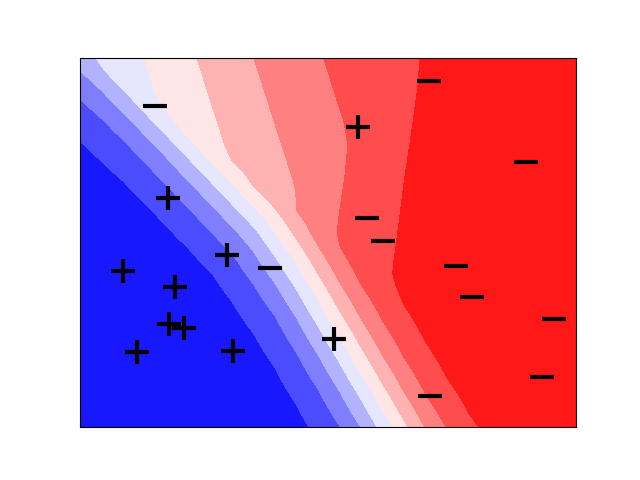

In [148]:
# For the saved animation the duration is going to be frames * (1 / fps) (in seconds)
# For the display animation the duration is going to be frames * interval / 1000 (in seconds)
del_t=2
#n_frames=len(step)//del_t
fig,ax=plt.subplots()


levels=np.linspace(0,1,11)#c='b',
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[0,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r,ticks=[])
#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r)
def animate(time):
    global ctf
    for c in ctf.collections:
        c.remove()
    ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[time,:,:,1],
                    cmap=plt.cm.bwr_r,vmin=0,vmax=1,levels=levels)
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='k',s=300,edgecolors='m',linewidth='3')
    return ctf
#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)#, interval=500)

<IPython.core.display.Javascript object>


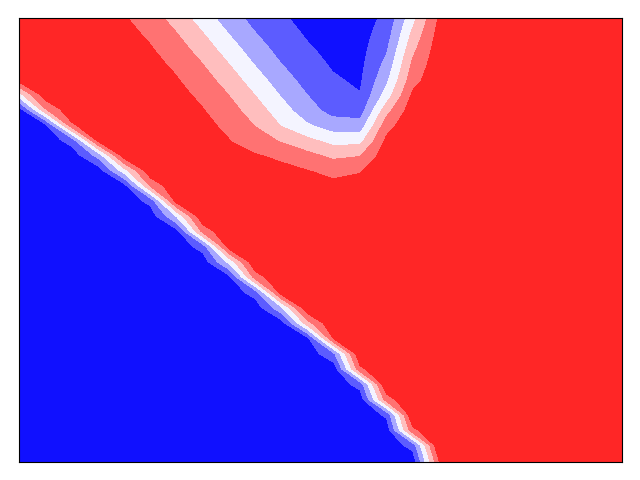

In [156]:
fig,ax=plt.subplots()
levels=np.linspace(0,1,11)#c='b',
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[-1,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig(record_dir+'/'+id_str+'_noanno_ctfbdry.pdf')
plt.savefig(record_dir+'/'+id_str+'_noanno_ctfbdry.jpg')

##  Noisy data (same dataset new noise model)

In [157]:
log_dir='./logs/Model_1119_191535_R2Noisy28'
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))

In [158]:
def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

In [159]:
def get_path(name,prefix,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/'+prefix+'*.npy')
    hasname=filter(lambda s:name in s[s.rfind(prefix):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind(prefix):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


In [160]:
W1=np.load(get_path('W1','wwatch'))
dW2=np.load(get_path('delu','wwatch'))
step=np.load(get_path('step','wwatch'))
gridP=np.load(get_path('Prob','hmwatch'))
gridX=np.load(get_path('gridX','hmwatch'))

In [161]:
gridP.shape, gridX.shape

((2500, 28, 24, 2), (28, 24, 2))

In [162]:
##Normalize Sizes##
wmax=W1.max(axis=0).max(axis=1)
wmin=W1.min(axis=0).min(axis=1)
xmax=npX.max(axis=0)
xmin=npX.min(axis=0)
dw2max=dW2.max(axis=0)
dw2min=dW2.min(axis=0)
wx_scale=(xmax-xmin)/(wmax-wmin)
print 'scale x/scale w',wx_scale

scale x/scale w [ 0.75241047  0.84178394]


<IPython.core.display.Javascript object>


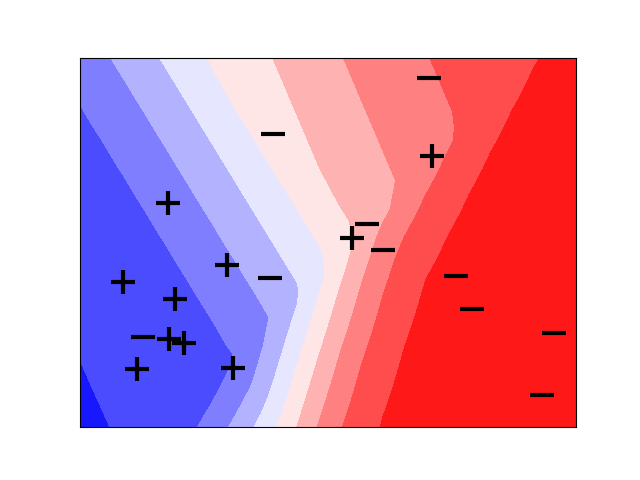

In [168]:
# For the saved animation the duration is going to be frames * (1 / fps) (in seconds)
# For the display animation the duration is going to be frames * interval / 1000 (in seconds)
del_t=2
#n_frames=len(step)//del_t
fig,ax=plt.subplots()


levels=np.linspace(0,1,11)#c='b',
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[0,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r,ticks=[])
#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r)
def animate(time):
    global ctf
    for c in ctf.collections:
        c.remove()
    ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[time,:,:,1],
                    cmap=plt.cm.bwr_r,vmin=0,vmax=1,levels=levels)
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='k',s=300,edgecolors='m',linewidth='3')
    return ctf
#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)#, interval=500)
anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)

In [167]:
anim.save?

In [169]:
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=100)
anim.save(record_dir+'/'+id_str+'_R2Noisy28_fps100.mp4', writer=writer)

IndexError: index 2501 is out of bounds for axis 0 with size 2500

<IPython.core.display.Javascript object>


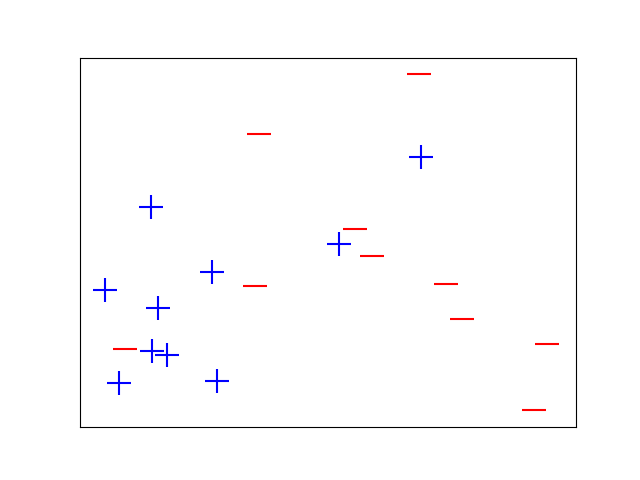

In [165]:
fig,ax=plt.subplots()

plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/'+id_str+'_noanno_scatter_data.pdf')
plt.savefig(record_dir+'/'+id_str+'_noanno_scatter_data.jpg')

<IPython.core.display.Javascript object>


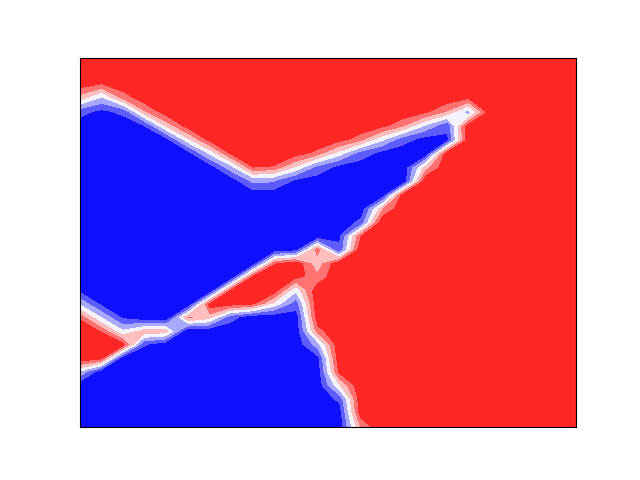

In [166]:
fig,ax=plt.subplots()
levels=np.linspace(0,1,11)#c='b',
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[-1,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/'+id_str+'_noanno_ctfbdry.pdf')
plt.savefig(record_dir+'/'+id_str+'_noanno_ctfbdry.jpg')

##  sv1r2 nice linsep data

In [257]:
#log_dir='./logs/Model_1119_195754_sv1R2_w8elu'
#log_dir='./logs/Model_1120_005455_sv1R2_w8elu_stdv0.8'
#log_dir='./logs/Model_1120_005901_sv1R2_w8elu_stdv0.8'
#log_dir='./logs/Model_1120_010218_sv1R2_w8elu_stdv0.8'
log_dir='./logs/Model_1120_164528_sv1R2_w16_stdv0.9_elu'
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))

In [258]:
def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

def get_path(name,prefix,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/'+prefix+'*.npy')
    hasname=filter(lambda s:name in s[s.rfind(prefix):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind(prefix):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


W1=np.load(get_path('W1','wwatch'))
dW2=np.load(get_path('delu','wwatch'))
step=np.load(get_path('step','wwatch'))
gridP=np.load(get_path('Prob','hmwatch'))
gridX=np.load(get_path('gridX','hmwatch'))

##Normalize Sizes##
wmax=W1.max(axis=0).max(axis=1)
wmin=W1.min(axis=0).min(axis=1)
xmax=npX.max(axis=0)
xmin=npX.min(axis=0)
dw2max=dW2.max(axis=0)
dw2min=dW2.min(axis=0)
wx_scale=(xmax-xmin)/(wmax-wmin)
print 'scale x/scale w',wx_scale

scale x/scale w [ 1.6309495   1.18448031]


<IPython.core.display.Javascript object>


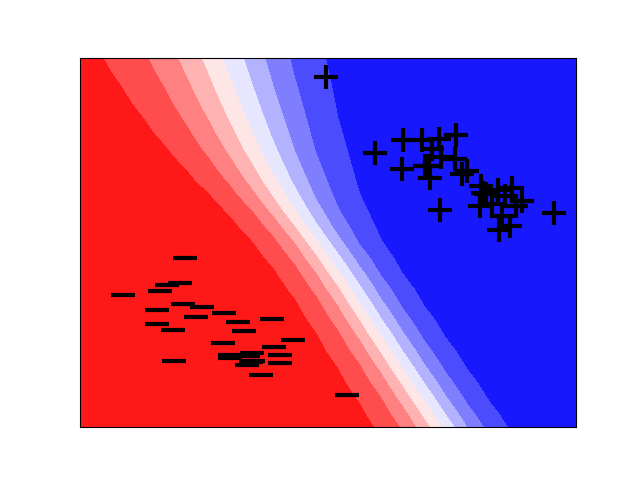

In [237]:
# For the saved animation the duration is going to be frames * (1 / fps) (in seconds)
# For the display animation the duration is going to be frames * interval / 1000 (in seconds)
del_t=2
#n_frames=len(step)//del_t
fig,ax=plt.subplots()


levels=np.linspace(0,1,11)#c='b',
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[0,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r,ticks=[])
#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r)
def animate(time):
    global ctf
    for c in ctf.collections:
        c.remove()
    ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[time,:,:,1],
                    cmap=plt.cm.bwr_r,vmin=0,vmax=1,levels=levels)
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='k',s=300,edgecolors='m',linewidth='3')
    return ctf
#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)#, interval=500)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)

In [176]:
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=100)
anim.save(record_dir+'/'+id_str+'_sv1R2_fps100.mp4', writer=writer)

<IPython.core.display.Javascript object>


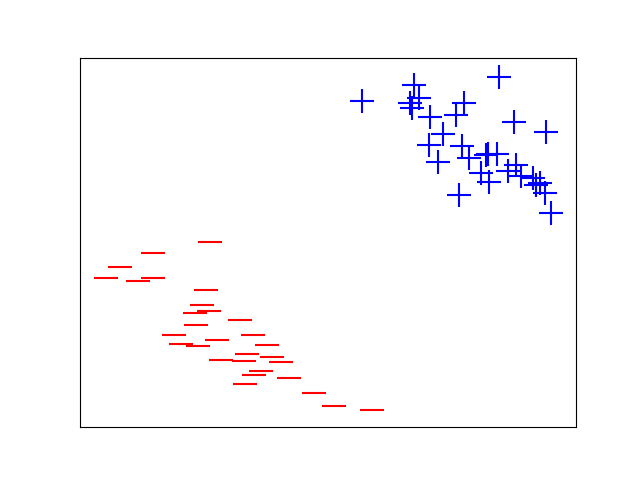

In [177]:
fig,ax=plt.subplots()

plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/'+id_str+'_noanno_scatter_data.pdf')
plt.savefig(record_dir+'/'+id_str+'_noanno_scatter_data.jpg')

<IPython.core.display.Javascript object>


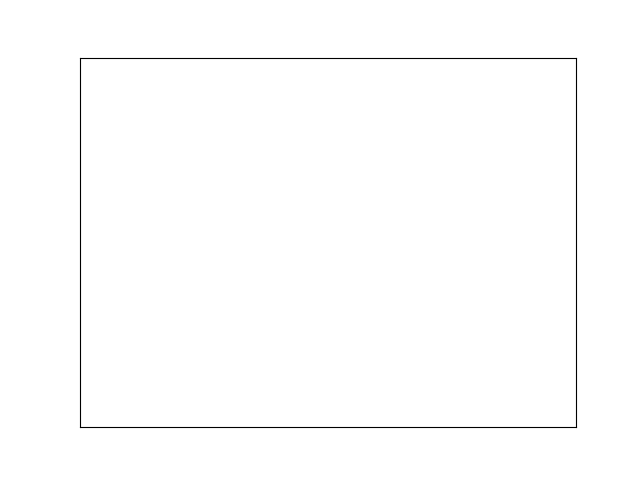

In [178]:
fig,ax=plt.subplots()
levels=np.linspace(0,1,11)#c='b',
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[-1,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/'+id_str+'_noanno_ctfbdry.pdf')
plt.savefig(record_dir+'/'+id_str+'_noanno_ctfbdry.jpg')

<IPython.core.display.Javascript object>


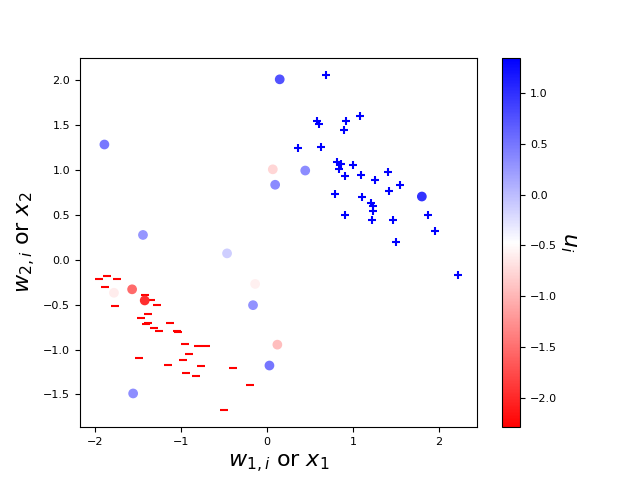

In [259]:
#FOR #log_dir='./logs/Model_1119_195754_sv1R2_w8elu'
#How to normalize colors each iter
normalize=mpl.colors.Normalize(vmin=min(dw2min),vmax=max(dw2max))
cm_map=mpl.cm.ScalarMappable(norm=normalize,cmap=mpl.cm.bwr_r)

#%%capture
fig,ax=plt.subplots()
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')

scat=plt.scatter(wx_scale[0]*W1[0,0,:],
                 wx_scale[1]*W1[0,1,:],
#                 c=dW2[0],cmap=cm_map )
#                 cm_map.to_rgba(dW2[0]) )
                 c=dW2[0],cmap='bwr_r',
                  norm=normalize)
#scat=plt.scatter(wx_scale[0]*W1[0,0,:],wx_scale[1]*W1[0,1,:],c=dW2[0],cmap='bwr_r')
cbar=plt.colorbar(scat)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('$u_i$', rotation=270,fontsize=16)
ax.set_xlabel('$w_{1,i}$ or $x_1$',fontsize=16)
ax.set_ylabel('$w_{2,i}$ or $x_2$',fontsize=16)
# cbar.ax.set_ylabel('Param $u_i$', rotation=270,fontsize=16)
# ax.set_xlabel('Param $w_{1,i}$ or Input $x_1$',fontsize=16)
# ax.set_ylabel('Param $w_{2,i}$ or Input $x_2$',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=6)

#cbar
def animate(time):
    scat.set_offsets(np.c_[wx_scale[0]*W1[time,0,:],
                           wx_scale[1]*W1[time,1,:]])
    scat.set_color(cm_map.to_rgba(dW2[time]))
#    scat.set_facecolor(dW2[time])
#    scat.set_color(plt.cm.bwr_r(dW2[time]))

#    scat.draw()
#    plt.draw()
    #plt.scatter(W1[time,0,:],W1[time,1,:],c=dW2[time],cmap='bwr_r')
    #plt.setp(p.lines,linewidth=7)
Ani = animation.FuncAnimation(fig, animate, frames=85, repeat=True,interval=100)

<IPython.core.display.Javascript object>


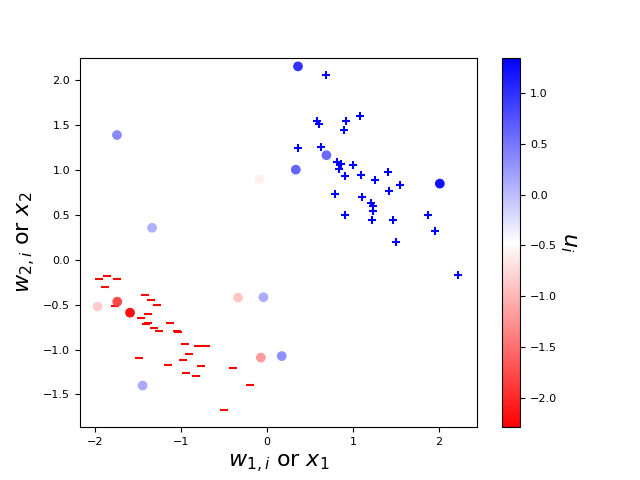

In [260]:
#How to normalize colors each iter
normalize=mpl.colors.Normalize(vmin=min(dw2min),vmax=max(dw2max))
cm_map=mpl.cm.ScalarMappable(norm=normalize,cmap=mpl.cm.bwr_r)

#%%capture
fig,ax=plt.subplots()
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')

scat=plt.scatter(wx_scale[0]*W1[0,0,:],
                 wx_scale[1]*W1[0,1,:],
#                 c=dW2[0],cmap=cm_map )
#                 cm_map.to_rgba(dW2[0]) )
                 c=dW2[0],cmap='bwr_r',
                  norm=normalize)
#scat=plt.scatter(wx_scale[0]*W1[0,0,:],wx_scale[1]*W1[0,1,:],c=dW2[0],cmap='bwr_r')
cbar=plt.colorbar(scat)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('$u_i$', rotation=270,fontsize=16)
ax.set_xlabel('$w_{1,i}$ or $x_1$',fontsize=16)
ax.set_ylabel('$w_{2,i}$ or $x_2$',fontsize=16)
# cbar.ax.set_ylabel('Param $u_i$', rotation=270,fontsize=16)
# ax.set_xlabel('Param $w_{1,i}$ or Input $x_1$',fontsize=16)
# ax.set_ylabel('Param $w_{2,i}$ or Input $x_2$',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=6)

#cbar
def animate(time):
    scat.set_offsets(np.c_[wx_scale[0]*W1[time,0,:],
                           wx_scale[1]*W1[time,1,:]])
    scat.set_color(cm_map.to_rgba(dW2[time]))
#    scat.set_facecolor(dW2[time])
#    scat.set_color(plt.cm.bwr_r(dW2[time]))

#    scat.draw()
#    plt.draw()
    #plt.scatter(W1[time,0,:],W1[time,1,:],c=dW2[time],cmap='bwr_r')
    #plt.setp(p.lines,linewidth=7)
Ani500 = animation.FuncAnimation(fig, animate, frames=500, repeat=True,interval=10)
#Ani85 = animation.FuncAnimation(fig, animate, frames=85, repeat=True,interval=100)

In [262]:
Writer = animation.writers['ffmpeg']
writer10 = Writer(metadata=dict(artist='Me'),fps=10)
writer100 = Writer(metadata=dict(artist='Me'),fps=100)
Ani500.save(record_dir+'/'+id_str+'_sv1R2_stdv0.9_fps100_frames500_dpi300.mp4', writer=writer100,dpi=300)
#Ani85.save(record_dir+'/'+id_str+'_sv1R2_fps10_frames85_dpi1000.mp4', writer=writer10,dpi=1000)

In [214]:
Writer?

### Deep Network first attempt

In [248]:
#log_dir='./logs/Model_1119_195754_sv1R2_w8elu'
#log_dir='./logs/Model_1120_005455_sv1R2_w8elu_stdv0.8'
#log_dir='./logs/Model_1120_005901_sv1R2_w8elu_stdv0.8'
#log_dir='./logs/Model_1120_010218_sv1R2_w8elu_stdv0.8'
log_dir='./logs/Model_1120_130950_sv1R2_deep8.10.15arch_lrelu'
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))

In [249]:
def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

def get_path(name,prefix,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/'+prefix+'*.npy')
    hasname=filter(lambda s:name in s[s.rfind(prefix):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind(prefix):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


W1=np.load(get_path('W1','wwatch'))
dW2=np.load(get_path('delu','wwatch'))
step=np.load(get_path('step','wwatch'))
gridP=np.load(get_path('Prob','hmwatch'))
gridX=np.load(get_path('gridX','hmwatch'))

##Normalize Sizes##
wmax=W1.max(axis=0).max(axis=1)
wmin=W1.min(axis=0).min(axis=1)
xmax=npX.max(axis=0)
xmin=npX.min(axis=0)
dw2max=dW2.max(axis=0)
dw2min=dW2.min(axis=0)
wx_scale=(xmax-xmin)/(wmax-wmin)
print 'scale x/scale w',wx_scale

scale x/scale w [ 5.6050539   4.69893312]


<IPython.core.display.Javascript object>


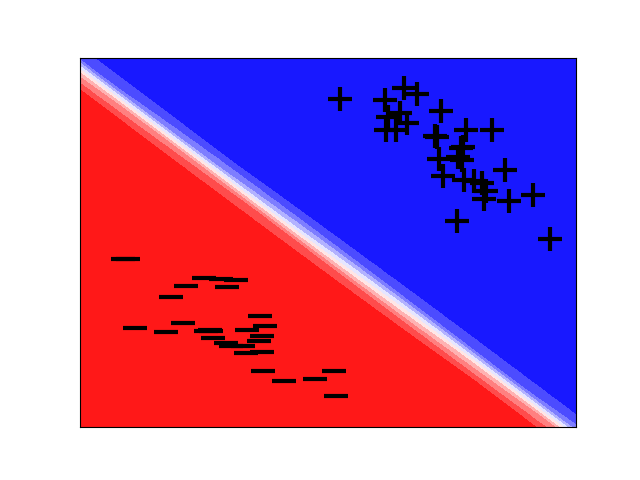

In [251]:
# For the saved animation the duration is going to be frames * (1 / fps) (in seconds)
# For the display animation the duration is going to be frames * interval / 1000 (in seconds)
#del_t=2
del_t=1
#n_frames=len(step)//del_t
fig,ax=plt.subplots()


levels=np.linspace(0,1,11)#c='b',
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[0,:,:,1],cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r,ticks=[])
#fig.colorbar(ctf,boundaries=[0.,1.],cmap=plt.cm.bwr_r)
def animate(time):
    global ctf
    for c in ctf.collections:
        c.remove()
    ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],gridP[time,:,:,1],
                    cmap=plt.cm.bwr_r,vmin=0,vmax=1,levels=levels)
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='k',s=300,edgecolors='m',linewidth='3')
    return ctf
#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
anim_deep = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(step),del_t), repeat=True,interval=10)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)

In [253]:
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=100)
anim_deep.save(record_dir+'/'+id_str+'_deep8.10.15_sv1R2_fps100.mp4', writer=writer)

### Old stuff below###

<IPython.core.display.Javascript object>


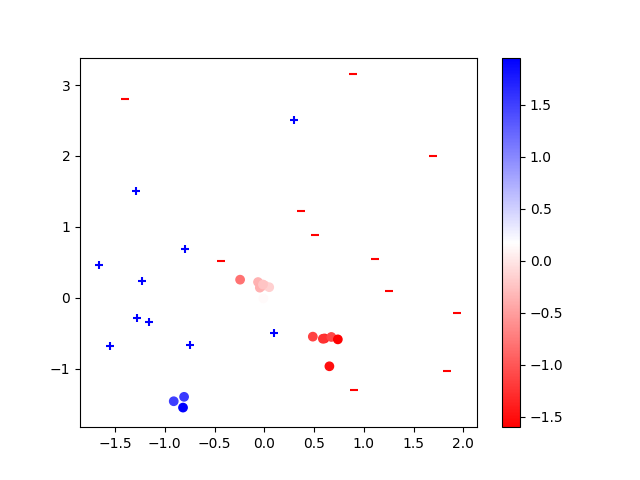

In [79]:
time=300
fig,ax=plt.subplots()

plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')
#plt.scatter(Xpos)
plt.scatter(W1[time,0,:],W1[time,1,:],c=dW2[time],cmap='bwr_r')
plt.colorbar()

In [80]:
plt.savefig(os.path.join(record_dir,'testplot.pdf'))

In [81]:
##Animation

In [82]:
#Does this have to be done before animation???
assert('ffmpeg' in animation.writers.list())#I guess you could use a diff one
Writer = animation.writers['ffmpeg']
#writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=3800)

<IPython.core.display.Javascript object>


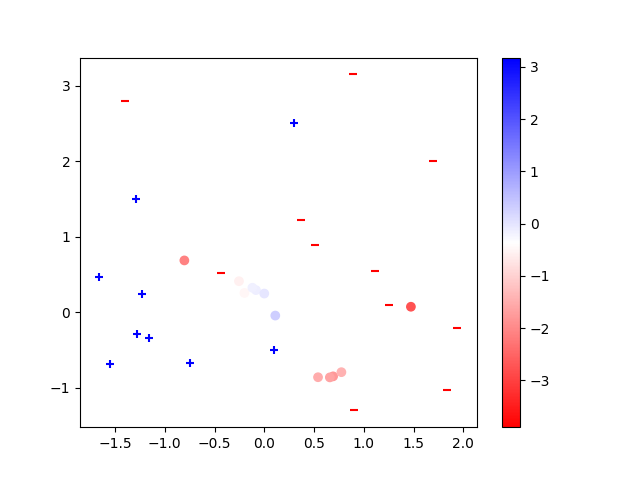

In [83]:
#How to normalize colors each iter
normalize=mpl.colors.Normalize(vmin=min(dw2min),vmax=max(dw2max))
cm_map=mpl.cm.ScalarMappable(norm=normalize,cmap=mpl.cm.bwr_r)

#%%capture
fig,ax=plt.subplots()
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b')
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r')

scat=plt.scatter(wx_scale[0]*W1[0,0,:],
                 wx_scale[1]*W1[0,1,:],
#                 c=dW2[0],cmap=cm_map )
#                 cm_map.to_rgba(dW2[0]) )
                 c=dW2[0],cmap='bwr_r',
                  norm=normalize)
#scat=plt.scatter(wx_scale[0]*W1[0,0,:],wx_scale[1]*W1[0,1,:],c=dW2[0],cmap='bwr_r')
plt.colorbar()
def animate(time):
    scat.set_offsets(np.c_[wx_scale[0]*W1[time,0,:],
                           wx_scale[1]*W1[time,1,:]])
    scat.set_color(cm_map.to_rgba(dW2[time]))
#    scat.set_facecolor(dW2[time])
#    scat.set_color(plt.cm.bwr_r(dW2[time]))

#    scat.draw()
#    plt.draw()
    #plt.scatter(W1[time,0,:],W1[time,1,:],c=dW2[time],cmap='bwr_r')
    #plt.setp(p.lines,linewidth=7)
ani = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True,interval=10)

In [84]:
ani.save(os.path.join(record_dir,'TestAnimhighres.mp4'), writer=writer)

In [23]:
%matplotlib inline

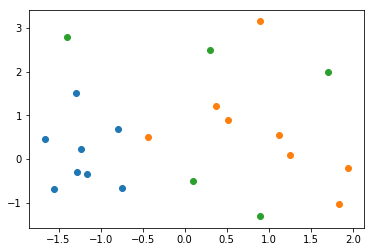

In [56]:
fig,ax=plt.subplots()
np.random.seed(27)
rX=np.random.rand(5,2)*4.-2.
#ax.scatter(rX[:,0],rX[:,1])
pX=np.random.multivariate_normal([-1.,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(pX[:,0],pX[:,1])
nX=np.random.multivariate_normal([+1.,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(nX[:,0],nX[:,1])
rX=np.array([[0.1,-0.5],
             [0.9,-1.3],
             [-1.4,2.8],
             [0.3,2.5],
             [1.7,2.0]])
ax.scatter(rX[:,0],rX[:,1])

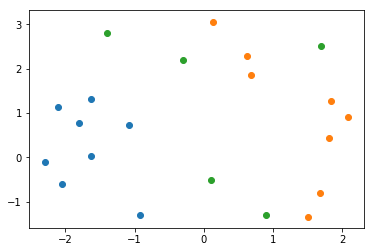

In [59]:
fig,ax=plt.subplots()
np.random.seed(22)
#ax.scatter(rX[:,0],rX[:,1])
pX=np.random.multivariate_normal([-1.5,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(pX[:,0],pX[:,1])
nX=np.random.multivariate_normal([+1.5,0.]  ,[[0.3,0],[0,1.5]], 8)
ax.scatter(nX[:,0],nX[:,1])
rX=np.array([[0.1,-0.5],
             [0.9,-1.3],
             [-1.4,2.8],
             [-0.3,2.2],
             [1.7,2.5]])
ax.scatter(rX[:,0],rX[:,1])

In [ ]:
fig.scatter

In [39]:
plt.subplots?